In [137]:
import pandas as pd
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [138]:
import allel

vcf = allel.read_vcf('../key_files/greneNet_final_v1.1_LDpruned.recode.vcf')

ecotypes_names = vcf['samples']

In [139]:
final_gen = pd.read_csv('../key_files/final_gen.csv')['sample_name'].to_list()
delta_ef=pd.read_csv('../key_files/delta_ecotype_freq.txt', sep = '\t', usecols = final_gen)#[['log_p1_p0','ecotype', 'site','plot']]

ef=pd.read_csv('../key_files/merged_ecotype_frequency.txt', sep = '\t', usecols = final_gen)#[['log_p1_p0','ecotype', 'site','plot']]

In [140]:
ef.index = ecotypes_names

In [141]:
unique_sites = pd.read_csv('../key_files/final_gen.csv')['site'].unique()

In [142]:
unique_sites

array([ 1,  2,  4,  5,  6,  9, 10, 11, 12, 13, 23, 24, 25, 26, 27, 28, 32,
       33, 37, 42, 43, 45, 46, 48, 49, 52, 53, 54, 55, 57, 60])

In [143]:
ef1

,1_2_2,1_2_3,1_3_1,1_3_4,1_3_5,1_3_6,1_3_7,1_3_8,1_3_9,1_3_10,1_3_11,1_3_12
0,-0.004564,-0.005069,-0.006023,-0.006325,-0.002035,-0.005694,-0.004663,-0.006352,-0.001513,-0.005991,-0.002278,-0.006257
1,-0.002939,-0.002973,-0.003510,-0.003642,-0.002933,-0.003165,-0.003265,-0.003185,-0.002612,-0.003627,-0.002842,-0.003415
2,-0.002825,-0.002615,-0.003037,-0.003077,-0.002890,-0.002913,-0.002886,-0.002875,-0.002779,-0.002926,-0.002398,-0.002598
3,-0.003645,-0.003646,-0.003793,-0.003950,-0.000866,-0.003715,-0.003569,-0.003413,-0.003381,-0.003790,-0.003544,-0.003888
4,-0.003877,-0.003854,-0.004037,-0.004193,0.036646,-0.004045,-0.003857,-0.003609,-0.003583,-0.004141,-0.003672,-0.004116
...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.000919,-0.001198,-0.001420,-0.001060,-0.001182,-0.001442,-0.000603,0.001033,-0.001051,-0.001490,0.000348,-0.000884
227,0.000815,-0.001544,-0.003068,-0.003147,-0.001921,-0.002749,-0.002402,-0.002860,-0.002258,-0.003182,-0.002237,-0.002803
228,-0.000993,-0.000890,-0.000991,-0.001323,-0.000554,-0.001249,-0.000895,-0.001251,0.000920,-0.001352,-0.000918,-0.001222
229,-0.001861,-0.001715,-0.002181,-0.002225,-0.001948,-0.002189,-0.002186,-0.002169,-0.001996,-0.002241,-0.001858,-0.002030


In [144]:
site = 1

In [ ]:
ef_f = ef1[sample]
conc = pd.concat([ef_f, cd],axis=1)
conc = conc.sort_values(sample)
## becasue some ecotpyes are nan 
conc = conc.dropna()
X_ranked = conc[sample]
y_ranked = conc[site]

sp_correlation, _ = spearmanr(X_ranked, y_ranked)
pearsonr_value = pearsonr(X_ranked, y_ranked)[0]
kendall_tau, _ = kendalltau(X_ranked, y_ranked)

X = conc[site].values.reshape(-1, 1)  # Independent variable
y = conc[sample].values # Dependent variable

# Fit the linear model
model = LinearRegression().fit(X, y)
# Predict the valu.es
y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)

res_list = [sp_correlation, pearsonr_value, r_squared, kendall_tau]

In [132]:
sample1

'60_1_11'

In [159]:
results = {}
for site in unique_sites:
    ef1 = delta_ef[[col for col in delta_ef.columns if col.startswith(f'{site}_')]]
    for sample1, sample2 in itertools.combinations(ef1.columns, 2):  # Generate unique pairs of samples
        
        conc = pd.concat([ef1[sample1], ef1[sample2]],axis=1)
        #conc = conc.sort_values(sample)
        ## becasue some ecotpyes are nan 
        conc = conc.dropna()
        X_ranked = conc[sample1]
        y_ranked = conc[sample2]

        sp_correlation, _ = spearmanr(X_ranked, y_ranked)
        pearsonr_value = pearsonr(X_ranked, y_ranked)[0]
        kendall_tau, _ = kendalltau(X_ranked, y_ranked)

        X = conc[sample1].values.reshape(-1, 1)  # Independent variable
        y = conc[sample2].values # Dependent variable

        # Fit the linear model
        model = LinearRegression().fit(X, y)
        # Predict the valu.es
        y_pred = model.predict(X)
        
        r_squared = r2_score(y, y_pred)

        res_list = [sp_correlation, pearsonr_value, r_squared, kendall_tau]
        for i in [10, 20, 30, 40, 50, 60, 100]:
            # Get top indices for sample1 and sample2
            top_10_observed_indices = ef1[sample1].sort_values().tail(i).index
            top_10_predicted_indices = ef1[sample2].sort_values().tail(i).index
    
            # Compare top indices
            common_top_indices = len(set(top_10_observed_indices).intersection(set(top_10_predicted_indices)))
    
            # Calculate the percentage of common indices
            top_10_match_percentage = (common_top_indices / i) * 100
            res_list.append(top_10_match_percentage)
    
        # Store the results
        results[str(site) + '-' + sample1 + '-' + sample2] = res_list

In [160]:
results = pd.DataFrame(results).T.reset_index()

In [161]:
results

,index,0,1,2,3,4,5,6,7,8,9,10
0,1-1_2_2-1_2_3,0.582004,0.100517,0.010104,0.483004,10.0,25.0,26.666667,32.5,42.0,53.333333,68.0
1,1-1_2_2-1_3_1,0.620070,0.274736,0.075480,0.491813,40.0,25.0,20.000000,32.5,46.0,46.666667,71.0
2,1-1_2_2-1_3_4,0.570565,0.302080,0.091252,0.440768,20.0,10.0,10.000000,25.0,40.0,43.333333,66.0
3,1-1_2_2-1_3_5,0.603347,0.066503,0.004423,0.482599,10.0,25.0,16.666667,32.5,44.0,51.666667,71.0
4,1-1_2_2-1_3_6,0.616682,0.168282,0.028319,0.493469,30.0,20.0,13.333333,27.5,44.0,50.000000,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,60-60_1_9-60_1_11,0.783460,0.399482,0.159586,0.627931,20.0,40.0,43.333333,57.5,60.0,63.333333,81.0
1877,60-60_1_9-60_1_12,0.609095,-0.022335,0.000499,0.457453,0.0,15.0,26.666667,37.5,54.0,60.000000,72.0
1878,60-60_1_10-60_1_11,0.736136,0.083087,0.006904,0.643490,10.0,25.0,43.333333,55.0,62.0,70.000000,85.0
1879,60-60_1_10-60_1_12,0.659067,0.034134,0.001165,0.519764,0.0,10.0,33.333333,45.0,58.0,63.333333,80.0


In [162]:

results.columns = ['index','sp_correlation', 'pearsonr', 'r_squared','kendall_tau', 'top_10','top_20','top_30','top_40','top_50','top_60', 'top_100']

#results.columns = ['index', 'top_10','top_20','top_30','top_40','top_50', 'top_60', 'top_100']

In [163]:
results['site'] = results['index'].str.split('-').str[0]
results['samples'] = results['index'].str.split('-').str[1] + '-' + results['index'].str.split('-').str[2]

In [165]:
results['site'].unique()

array(['1', '2', '4', '5', '6', '9', '10', '11', '12', '13', '23', '24',
       '25', '26', '27', '28', '32', '33', '37', '42', '43', '45', '46',
       '48', '49', '52', '53', '54', '55', '57', '60'], dtype=object)

In [166]:
results = results.drop('index',axis=1)

In [167]:
results.to_csv('baseline_pairwise_topecotypes_samples_top.csv',index=None)

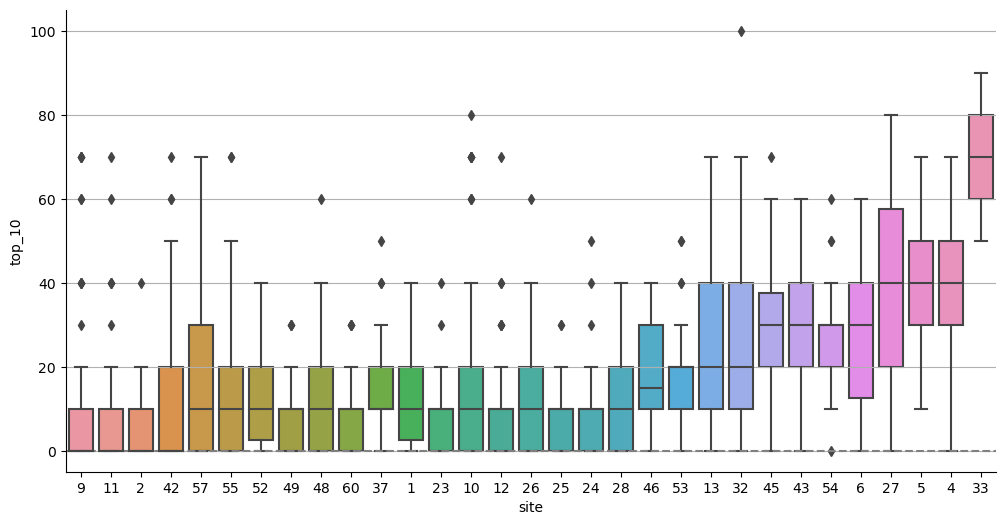

In [158]:
medians = results.groupby('site')['top_10'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.boxplot(data=results, y='top_10', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)


#plt.savefig('climatic_distance.png')
# Show the plot
plt.show()

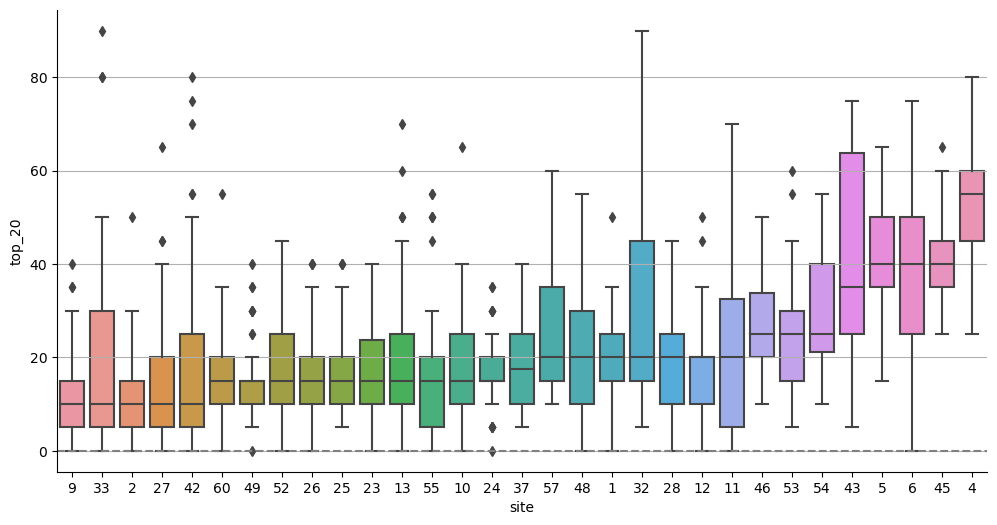

In [100]:
medians = results.groupby('site')['top_20'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.boxplot(data=results, y='top_20', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)


#plt.savefig('climatic_distance.png')
# Show the plot
plt.show()